In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
# v2

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def kmeans_2(k, file_name):
    data = pd.read_csv(file_name, header = None)

    x1 = data[0].values
    x2 = data[1].values
    X = np.array(list(zip(x1, x2)))
    
    plt.scatter(x1, x2, c='black', s=7)

    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(x1), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(0, np.max(x2), size=k)
    
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    print("Initial Centroids")
    print(C)
    
    # Plotting along with the Centroids
    plt.scatter(x1, x2, c='#050505', s=7)
    plt.scatter(C_x, C_y, marker='*', s=200, c='g')

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    print(X)
    print(clusters)
    Out = np.array(list(zip(X[:, 0], X[:, 1], clusters)))
    df = pd.DataFrame(Out)
    return df

In [ ]:
df1 = kmeans(3, 'xclara_test.csv')

In [ ]:
df1[2].value_counts()

In [19]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def distance(a, b, ax=1):
    print("------- Distance -------")
    print("a:")
    print(a)
    print()
    print("b:")
    print(b)
    print()
    print("a - b:")
    print(a - b)
    print()
    norm = np.linalg.norm(a - b, axis=ax)
    print("Distance: ", norm)
    print("-------------------------")
    return norm
            
def get_new_labels_iteration(X, centroids):
    new_labels = [np.argmin(distance(X[i], centroids)) for i in range(len(X))]
    return new_labels

def kmeans(k, file_name):
    data = pd.read_csv(file_name, header = None, sep='\t')
    print("K: ", k)
    x1 = data[0].values
    x2 = data[1].values
    
    centroid_x = np.random.randint(np.mean(x1) - np.std(x1), np.mean(x1) + np.std(x1), size=k)
    centroid_y = np.random.randint(np.mean(x2) - np.std(x2), np.mean(x2) + np.std(x2), size=k)
    centroid_x = np.array([np.max(x1) / (i + 1) for i in range(k)])
    centroid_y = np.array([np.max(x2) / (i + 1) for i in range(k)])
    # centroid_x = np.random.randint(0, np.max(x1), size=k)
    # centroid_y = np.random.randint(0, np.max(x2), size=k)
    
    
    X = np.array(list(zip(x1, x2)))
    
    plt.scatter(x1, x2, c='black', s=7)
    
    centroids = np.array(list(zip(centroid_x, centroid_y)))
    
    print("Initial Centroids")
    print(centroids)

    # Plotting along with the Centroids
    plt.scatter(x1, x2, c='#050505', s=7)
    plt.scatter(centroid_x, centroid_y, marker='*', s=200, c='g')
    
    temp_centroids = np.zeros(centroids.shape)
    cluster_labels = np.zeros(len(X))

    error = distance(centroids, temp_centroids, None)
    print("First error: ", error)

    while error != 0:
        cluster_labels = get_new_labels_iteration(X, centroids)
        print("Temp centroids 1: ")
        print(temp_centroids)
        temp_centroids = centroids.copy()
        print("Temp centroids 2: ")
        print(temp_centroids)
        for i in range(k):
            points = [X[j] for j in range(len(X)) if cluster_labels[j] == i]
            centroids[i] = np.mean(points, axis=0)
            if np.isnan(centroids[i]).any():
                centroids[i][0] = np.random.randint(0, np.max(x1))
                centroids[i][1] = np.random.randint(0, np.max(x2))
            print("Centroid i: ")
            print(centroids[i])
            print(type(centroids[i]))
            print(type(centroids[i][0]))
        error = distance(centroids, temp_centroids, None)
        print("End of loop error:")
        print(error)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if cluster_labels[j] == i])
            # print(points)
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    Out = np.array(list(zip(X[:, 0], X[:, 1], cluster_labels)))
    df = pd.DataFrame(Out)
    return df

K:  4
Initial Centroids
[[734.         317.        ]
 [367.         158.5       ]
 [244.66666667 105.66666667]
 [183.5         79.25      ]]
------- Distance -------
a:
[[734.         317.        ]
 [367.         158.5       ]
 [244.66666667 105.66666667]
 [183.5         79.25      ]]

b:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

a - b:
[[734.         317.        ]
 [367.         158.5       ]
 [244.66666667 105.66666667]
 [183.5         79.25      ]]

Distance:  953.9582195894233
-------------------------
First error:  953.9582195894233
------- Distance -------
a:
[380 223]

b:
[[734.         317.        ]
 [367.         158.5       ]
 [244.66666667 105.66666667]
 [183.5         79.25      ]]

a - b:
[[-354.          -94.        ]
 [  13.           64.5       ]
 [ 135.33333333  117.33333333]
 [ 196.5         143.75      ]]

Distance:  [366.26766169  65.79703641 179.11510886 243.46727193]
-------------------------
------- Distance -------
a:
[394 202]

b:
[[734.         317.        ]
 [367

 [277.         194.        ]]

Distance:  [ 48.59021579 198.21869853  77.20103626 338.17894671]
-------------------------
------- Distance -------
a:
[718 216]

b:
[[637.33333333 233.42857143]
 [491.         183.32258065]
 [663.         298.        ]
 [408.          30.        ]]

a - b:
[[ 80.66666667 -17.42857143]
 [227.          32.67741935]
 [ 55.         -82.        ]
 [310.         186.        ]]

Distance:  [ 82.52797231 229.33995233  98.73702446 361.51901748]
-------------------------
------- Distance -------
a:
[706 229]

b:
[[637.33333333 233.42857143]
 [491.         183.32258065]
 [663.         298.        ]
 [408.          30.        ]]

a - b:
[[ 68.66666667  -4.42857143]
 [215.          45.67741935]
 [ 43.         -69.        ]
 [298.         199.        ]]

Distance:  [ 68.80932608 219.79860472  81.3019065  358.3364341 ]
-------------------------
------- Distance -------
a:
[405 219]

b:
[[637.33333333 233.42857143]
 [491.         183.32258065]
 [663.         298.       

 [107.         -10.        ]]

Distance:  [111.56218314 127.35158672  69.38942687 107.46627378]
-------------------------
------- Distance -------
a:
[465 238]

b:
[[640.58064516 214.90322581]
 [491.         183.32258065]
 [628.18181818 285.63636364]
 [452.         301.        ]]

a - b:
[[-175.58064516   23.09677419]
 [ -26.           54.67741935]
 [-163.18181818  -47.63636364]
 [  13.          -63.        ]]

Distance:  [177.09326338  60.54436545 169.99273198  64.32728814]
-------------------------
------- Distance -------
a:
[473 222]

b:
[[640.58064516 214.90322581]
 [491.         183.32258065]
 [628.18181818 285.63636364]
 [452.         301.        ]]

a - b:
[[-167.58064516    7.09677419]
 [ -18.           38.67741935]
 [-155.18181818  -63.63636364]
 [  21.          -79.        ]]

Distance:  [167.73084641  42.66078724 167.72293663  81.74350127]
-------------------------
------- Distance -------
a:
[653 234]

b:
[[640.58064516 214.90322581]
 [491.         183.32258065]
 [628.1818

a - b:
[[ -32.44444444  -53.80555556]
 [ 138.3125      -65.8125    ]
 [  42.07142857 -159.28571429]
 [ 202.57142857  -90.14285714]]

Distance:  [ 62.83056409 153.17190608 164.74812253 221.72261582]
-------------------------
------- Distance -------
a:
[610 115]

b:
[[649.44444444 185.80555556]
 [478.6875     197.8125    ]
 [574.92857143 291.28571429]
 [414.42857143 222.14285714]]

a - b:
[[ -39.44444444  -70.80555556]
 [ 131.3125      -82.8125    ]
 [  35.07142857 -176.28571429]
 [ 195.57142857 -107.14285714]]

Distance:  [ 81.05116221 155.24459028 179.74053011 222.99725449]
-------------------------
------- Distance -------
a:
[587 116]

b:
[[649.44444444 185.80555556]
 [478.6875     197.8125    ]
 [574.92857143 291.28571429]
 [414.42857143 222.14285714]]

a - b:
[[ -62.44444444  -69.80555556]
 [ 108.3125      -81.8125    ]
 [  12.07142857 -175.28571429]
 [ 172.57142857 -106.14285714]]

Distance:  [ 93.65961898 135.73828794 175.70088509 202.60109595]
-------------------------
------- 

[718 216]

b:
[[649.44444444 185.80555556]
 [480.8        196.66666667]
 [574.92857143 291.28571429]
 [418.5        221.25      ]]

a - b:
[[ 68.55555556  30.19444444]
 [237.2         19.33333333]
 [143.07142857 -75.28571429]
 [299.5         -5.25      ]]

Distance:  [ 74.9104043  237.98659159 161.67056766 299.54601066]
-------------------------
------- Distance -------
a:
[706 229]

b:
[[649.44444444 185.80555556]
 [480.8        196.66666667]
 [574.92857143 291.28571429]
 [418.5        221.25      ]]

a - b:
[[ 56.55555556  43.19444444]
 [225.2         32.33333333]
 [131.07142857 -62.28571429]
 [287.5          7.75      ]]

Distance:  [ 71.16383137 227.50930628 145.11798507 287.60443755]
-------------------------
------- Distance -------
a:
[405 219]

b:
[[649.44444444 185.80555556]
 [480.8        196.66666667]
 [574.92857143 291.28571429]
 [418.5        221.25      ]]

a - b:
[[-244.44444444   33.19444444]
 [ -75.8          22.33333333]
 [-169.92857143  -72.28571429]
 [ -13.5        

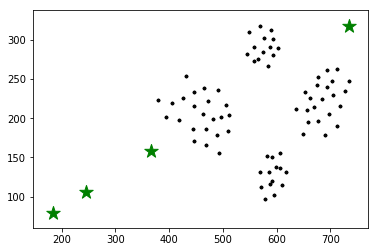

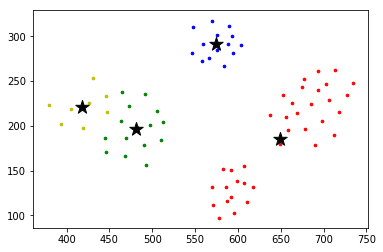

In [30]:
df2 = kmeans(4, 'input4k4.txt') # input1k2.txt, input2k2.txt, input3k3.txt, input4k4.txt

In [ ]:
df2[2].value_counts()

In [ ]:
df2

In [ ]:
def distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def get_new_centroid(X, i, cluster_labels):
    points = [X[j] for j in range(len(X)) if cluster_labels[j] == i]
    return np.mean(points, axis=0)            
            
def get_new_labels_iteration(X, centroids):
    new_labels = [np.argmin(distance(X[i], centroids)) for i in range(len(X))]
    return new_labels

def kmeans(k, file_name):
    data = pd.read_csv(file_name, header = None)

    x1 = data[0].values
    x2 = data[1].values
    
    centroid_x = np.random.randint(0, np.max(x1), size=k)
    centroid_y = np.random.randint(0, np.max(x2), size=k)
    
    X = np.array(list(zip(x1, x2)))
    centroids = np.array(list(zip(centroid_x, centroid_y)))
    temp_centroids = np.zeros(centroids.shape)
    cluster_labels = np.zeros(len(X))

    error = distance(centroids, temp_centroids, None)

    while error != 0:
        cluster_labels = get_new_labels_iteration(X, centroids)
        temp_centroids = centroids.copy()
        centroids = [get_new_centroid(X, i, cluster_labels) for i in range(k)]
        error = distance(centroids, temp_centroids, None)
        
    Out = np.array(list(zip(X[:, 0], X[:, 1], cluster_labels)))
    df = pd.DataFrame(Out)
    return df